# Data Analytics
## Stock predictions

First exploring and understanding the stock datasets these will lead onto prediction analysis using:

*   Simple linear analysis
*   Quadratic Linear Analysis (QDA)
*   K Nearest Neighbor (KNN)

This project applies pandas and its web data reader to communicate with the most updated financial data.


In [126]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

df = web.DataReader("GOOG", "yahoo", start, end)
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-30,1198.500000,1183.802979,1198.500000,1188.099976,1129800.0,1188.099976
2019-09-03,1186.890015,1163.199951,1177.030029,1168.390015,1479900.0,1168.390015
2019-09-04,1183.479980,1171.000000,1176.709961,1181.410034,1068900.0,1181.410034
2019-09-05,1213.040039,1191.530029,1191.530029,1211.380005,1408100.0,1211.380005
2019-09-06,1212.015015,1202.521973,1208.130005,1204.930054,1071600.0,1204.930054


In [127]:
df.shape

(2436, 6)

The following calculates a rolling mean (moving average), simplifying price data.

In [128]:
close_px = df['Adj Close']
mavg = close_px.rolling(window = 100).mean()
mavg.tail(10)

Date
2019-08-23    1157.271696
2019-08-26    1156.901395
2019-08-27    1156.429795
2019-08-28    1156.068495
2019-08-29    1155.958595
2019-08-30    1155.867095
2019-09-03    1155.529395
2019-09-04    1155.297295
2019-09-05    1155.232395
2019-09-06    1155.070696
Name: Adj Close, dtype: float64

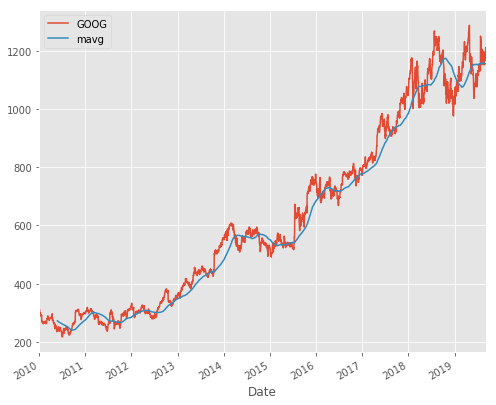

In [129]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import style

#Size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize = (8, 7))
mpl.__version__

#Style of matplotlib
style.use('ggplot')

close_px.plot(label = 'GOOG')
mavg.plot(label = 'mavg')
plt.legend()

Here we define the returns made at the closing price.

In [130]:
rets = close_px / close_px.shift(1) - 1
rets.head(5)

#otherwise a quicker way is close_px.pct_change().head()

Date
2010-01-04         NaN
2010-01-05   -0.004404
2010-01-06   -0.025209
2010-01-07   -0.023280
2010-01-08    0.013331
Name: Adj Close, dtype: float64

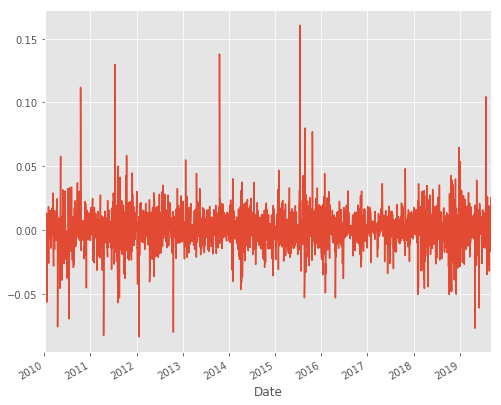

In [131]:
rets.plot(label = 'return')

Now we are going to assess the correlations amongst different companies and how their stock prices move with respect to one another.

In [132]:
dfcomp = web.DataReader(['AAPL', 'MSFT', 'IBM', 'TEAM', 'GOOG'], 'yahoo', start = start, end = end)['Adj Close']
dfcomp.tail(5)

Symbols,AAPL,GOOG,IBM,MSFT,TEAM
Date,,,,,
2019-08-30,208.740005,1188.099976,135.529999,137.860001,134.509995
2019-09-03,205.699997,1168.390015,134.100006,136.039993,131.889999
2019-09-04,209.190002,1181.410034,136.320007,137.630005,129.830002
2019-09-05,213.279999,1211.380005,140.970001,140.050003,133.339996
2019-09-06,213.259995,1204.930054,140.570007,139.100006,132.210007


In [133]:
dfcomp.shape

(2436, 5)

In [134]:
retscomp = round(dfcomp.pct_change(), 4)

corr = retscomp.corr()
corr

Symbols,AAPL,GOOG,IBM,MSFT,TEAM
Symbols,,,,,
AAPL,1.000000,0.463611,0.386942,0.458240,0.321935
GOOG,0.463611,1.000000,0.407753,0.539281,0.364245
IBM,0.386942,0.407753,1.000000,0.492810,0.223282
MSFT,0.458240,0.539281,0.492810,1.000000,0.411270
TEAM,0.321935,0.364245,0.223282,0.411270,1.000000


Text(0, 0.5, 'Returns GOOG')

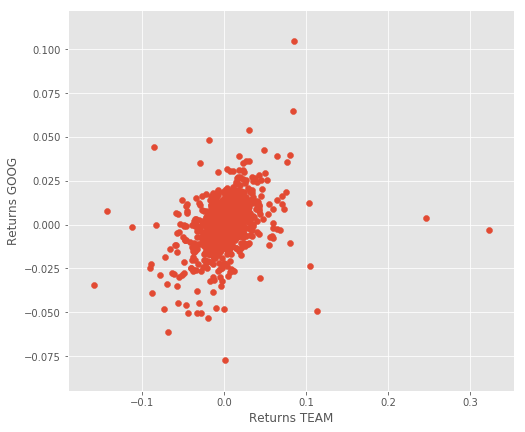

In [135]:
plt.scatter(retscomp.TEAM, retscomp.GOOG)
plt.xlabel('Returns TEAM')
plt.ylabel('Returns GOOG')

Completing a scatter matrix amongst the competitors selected above we can find the kernel density estimation (KDE) of each company. A normal distribution that is shifted more to the left is more likely negative in the long run while to the right is more likely positive. The centre are more likely 0.

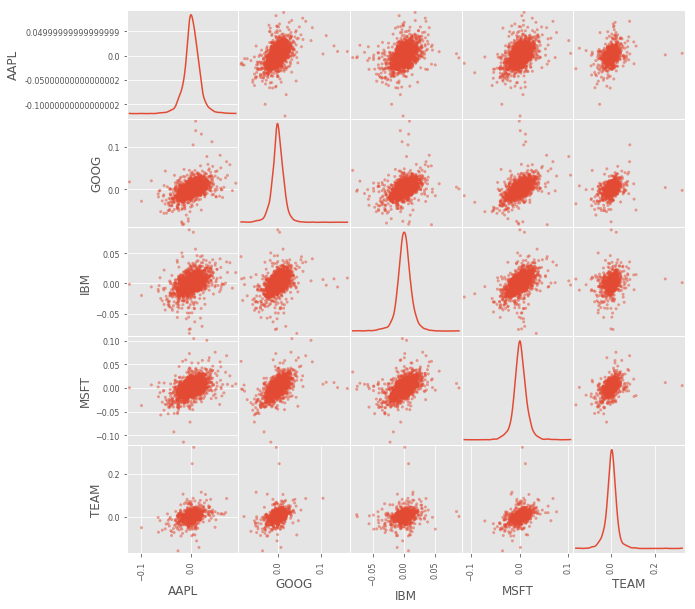

In [136]:
from pandas.plotting import scatter_matrix
scatter_matrix(retscomp, diagonal = 'kde', figsize = (10, 10));

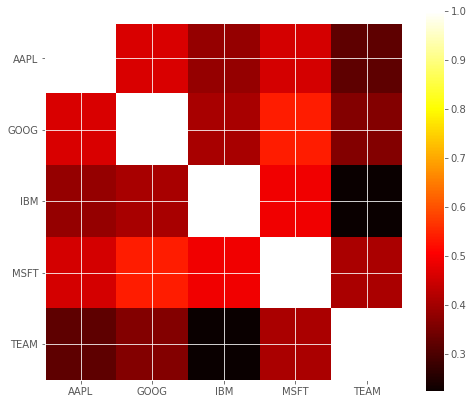

In [137]:
plt.imshow(corr, cmap = 'hot', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

Assessing through kurtosis and skewness we will now determine the level of risk associated with each stock.

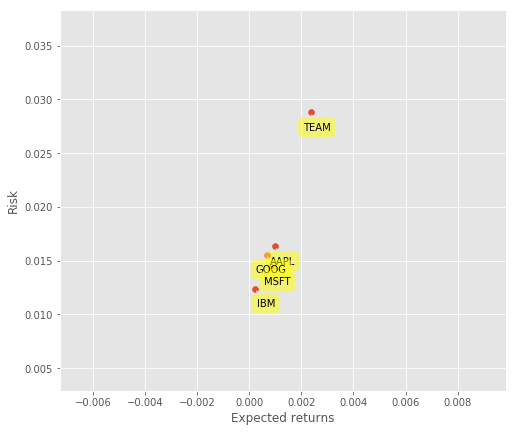

In [138]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
  plt.annotate(
      label,
      xy = (x, y ), xytext = (20, -20),
      textcoords = 'offset points', ha = 'right', va = 'bottom',
      bbox = dict(boxstyle = 'round,pad = 0.5', fc = 'yellow', alpha = 0.5), 
      arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
  )

Applying simple linear analysis, quadratic linear analysis (QDA) and K-Nearest Neighbour (KNN) models the following will produce predictions on stock price movements.

In [139]:
dfreg = df.loc[:,['Adj Close', 'Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
print(dfreg.head())

#Another table for the Quadratic prediction model
dfreg1 = df.loc[:,['Adj Close', 'Volume']]
dfreg1['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg1['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

#Another table for the KNN prediction model
dfreg2 = df.loc[:,['Adj Close', 'Volume']]
dfreg2['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg2['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0


             Adj Close      Volume    HL_PCT  PCT_change
Date                                                    
2010-01-04  312.204773   3927000.0  0.840843   -0.031905
2010-01-05  310.829926   6031900.0  1.009634   -0.508628
2010-01-06  302.994293   7987100.0  3.205866   -2.812134
2010-01-07  295.940735  12876600.0  2.920385   -2.510665
2010-01-08  299.885956   9483900.0  2.348763    1.692571


In [140]:
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate


# Drop missing value
dfreg.fillna(value = -99999, inplace = True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

#Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'],1))

#Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

#Finally We want to find Data Series of Late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

#Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X', X.shape)
print('Dimension of y', y.shape)

(2436, 4)
Dimension of X (2411, 4)
Dimension of y (2411,)


In [0]:
#Quadratic model

# Drop missing value
dfreg1.fillna(value = -99999, inplace = True)

# We want to separate 1 percent of the data to forecast
forecast_out1 = int(math.ceil(0.01 * len(dfreg1)))

#Separating the label here, we want to predict the AdjClose
forecast_col1 = 'Adj Close'
dfreg1['label'] = dfreg1[forecast_col1].shift(-forecast_out1)
X1 = np.array(dfreg1.drop(['label'],1))

#Scale the X so that everyone can have the same distribution for linear regression
X1 = preprocessing.scale(X1)

#Finally We want to find Data Series of Late X and early X (train) for model generation and evaluation
X_lately1 = X1[-forecast_out1:]
X1 = X1[:-forecast_out1]

#Separate label and identify it as y
y1 = np.array(dfreg1['label'])
y1 = y1[:-forecast_out1]

#KNN model

# Drop missing value
dfreg2.fillna(value = -99999, inplace = True)

# We want to separate 1 percent of the data to forecast
forecast_out2 = int(math.ceil(0.01 * len(dfreg2)))

#Separating the label here, we want to predict the AdjClose
forecast_col2 = 'Adj Close'
dfreg2['label'] = dfreg2[forecast_col2].shift(-forecast_out2)
X2 = np.array(dfreg2.drop(['label'],1))

#Scale the X so that everyone can have the same distribution for linear regression
X2 = preprocessing.scale(X2)

#Finally We want to find Data Series of Late X and early X (train) for model generation and evaluation
X_lately2 = X2[-forecast_out2:]
X2 = X2[:-forecast_out2]

#Separate label and identify it as y
y2 = np.array(dfreg2['label'])
y2 = y2[:-forecast_out2]

In [0]:
from sklearn.model_selection import train_test_split
#Separation of training and testing of model by cross validatoin train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Similarly for the other two models
#Quadratic

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

#KNN
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2)

Producing the model:

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Linear regression
clfreg = LinearRegression(n_jobs = -1)
clfreg.fit(X_train, y_train)

#Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

#Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X1_train, y1_train)

#KNN Regression
clfknn = KNeighborsRegressor(n_neighbors = 2)
clfknn.fit(X2_train, y2_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

Testing the model.

In [144]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test, y_test)
confidencepoly3 = clfpoly3.score(X1_test, y1_test)
confidenceknn = clfknn.score(X2_test, y2_test)

print("The linear regression confidence is", confidencereg)
print("The quadratic regression 2 confidence is ", confidencepoly2)
print("The quadratic regression 3 confidence is ", confidencepoly3)
print("The knn regression confidence is ", confidenceknn)

The linear regression confidence is 0.9783186242580034
The quadratic regression 2 confidence is  0.978952884726022
The quadratic regression 3 confidence is  0.981597361727493
The knn regression confidence is  0.965152081420818


The results above imply that the quadratic regression 3 holds the most accurate.

Price trajectories vary from company and hence must be considered. To understand this better we will produce a plot of these predictions.

In [145]:
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out)

forecast_set1 = clfpoly3.predict(X_lately)
dfreg1['Forecast'] = np.nan
print(forecast_set1, confidencepoly3, forecast_out1)

forecast_set2 = clfknn.predict(X_lately)
dfreg2['Forecast'] = np.nan
print(forecast_set2, confidenceknn, forecast_out2)



[1201.86724866 1164.64189056 1177.63677478 1184.23306716 1215.12372817
 1198.50254399 1184.23525772 1208.30226966 1174.42414915 1174.55628981
 1184.04703168 1205.90613811 1191.88650995 1199.25285853 1199.64588532
 1170.66705366 1176.41021838 1179.05518698 1180.65700466 1199.9052538
 1196.71112538 1179.07482075 1188.4469253  1218.71109115 1211.31426968] 0.9783186242580034 25
[1165.11427071 1136.2960754  1147.68315219 1156.69869768 1176.31165884
 1172.42636893 1162.89056945 1178.2734705  1151.76022816 1153.64489537
 1159.16738366 1172.32633733 1172.52289092 1176.57647296 1172.80429056
 1157.49910763 1155.58744314 1161.16589444 1162.01672827 1172.4938417
 1171.48660519 1153.9413597  1164.79452974 1181.1557603  1179.27392499] 0.981597361727493 25
[1172.54998779 1035.86499023 1140.54998779 1098.76501465 1117.06500244
 1115.60498047 1218.46002197 1224.84997559 1157.97998047 1195.24499512
 1139.39501953 1140.23999023 1226.67999268 1139.39501953 1058.42999268
 1044.70498657 1180.66003418 1160.

In [0]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days = 1)

for i in forecast_set:
  next_date = next_unix
  next_unix += datetime.timedelta(days=1)
  dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

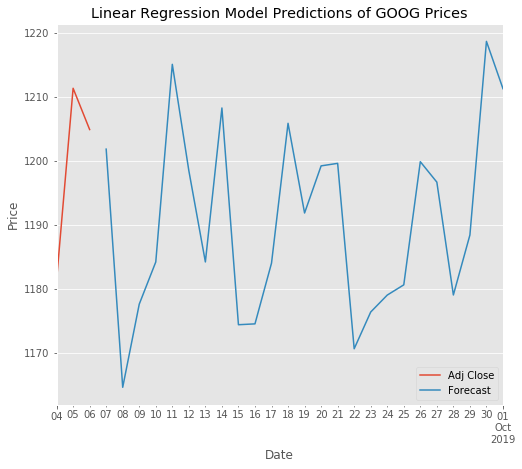

In [147]:
dfreg['Adj Close'].tail(28).plot()
dfreg['Forecast'].tail(28).plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear Regression Model Predictions of GOOG Prices')
plt.show()

In [0]:
last_date = dfreg1.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days = 1)

for i in forecast_set1:
  next_date = next_unix
  next_unix += datetime.timedelta(days=1)
  dfreg1.loc[next_date] = [np.nan for _ in range(len(dfreg1.columns)-1)]+[i]

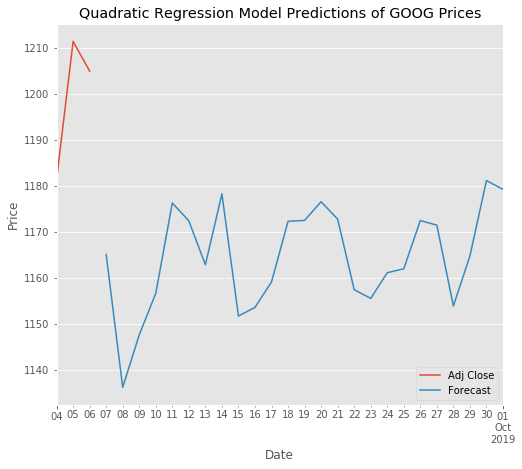

In [149]:
dfreg1['Adj Close'].tail(28).plot()
dfreg1['Forecast'].tail(28).plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Quadratic Regression Model Predictions of GOOG Prices')
plt.show()

In [0]:
last_date = dfreg2.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days = 1)

for i in forecast_set2:
  next_date = next_unix
  next_unix += datetime.timedelta(days=1)
  dfreg2.loc[next_date] = [np.nan for _ in range(len(dfreg2.columns)-1)]+[i]

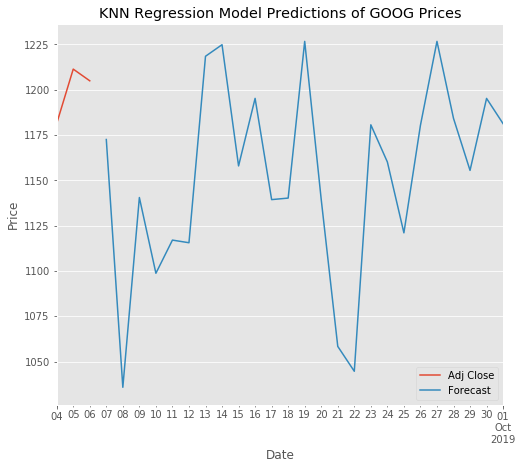

In [151]:
dfreg2['Adj Close'].tail(28).plot()
dfreg2['Forecast'].tail(28).plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('KNN Regression Model Predictions of GOOG Prices')
plt.show()